# Dendogramas

Consideroamos los datos de CONAPO de marginación por estado. 

## Parte 1
Examina los siguientes datos y considera las preguntas de abajo. Qusiéramos agrupar estados según el valor de las variables que se usan en la construcción del ínidce de marginación.

In [40]:
%autosave 0
import pandas as pd
import plotnine
from plotnine import ggplot, aes, geom_point, theme_classic, coord_equal
indice = pd.read_csv("../datos/indice-estatal.csv")
indice.info()

Autosave disabled
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 18 columns):
CVE_ENT     197 non-null object
NOM_ENT     197 non-null object
POB_TOT     197 non-null int64
ANALF       197 non-null float64
SPRIM       197 non-null float64
OVSDE       197 non-null object
OVSEE       197 non-null float64
OVSAE       197 non-null float64
VHAC        197 non-null float64
OVPT        197 non-null float64
PL<5000     197 non-null float64
PO2SM       197 non-null float64
OVSDSE      197 non-null object
IM          197 non-null object
GM          197 non-null object
IND0A100    197 non-null object
LUGAR       197 non-null object
AÑO         197 non-null int64
dtypes: float64(8), int64(2), object(8)
memory usage: 27.8+ KB


In [49]:
indice_15 = indice.query('NOM_ENT!= "Nacional" and AÑO==2015').iloc[:, 1:12]
indice_15 = indice_15.set_index('NOM_ENT').drop(columns=['POB_TOT'])
indice_15

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL<5000,PO2SM
NOM_ENT,,,,,,,,,
Aguascalientes,2.60,11.89,0.67,0.30,0.81,21.86,0.75,25.16,34.60
Baja California,1.96,10.46,0.26,0.47,2.82,23.03,1.15,10.35,22.85
Baja California Sur,2.51,11.59,0.38,1.14,7.15,26.23,4.08,15.62,22.37
Campeche,6.68,18.56,4.08,1.59,6.49,37.93,2.95,30.88,40.69
Coahuila de Zaragoza,1.99,9.56,0.62,0.29,1.67,23.62,0.66,12.15,27.94
Colima,3.90,15.24,0.38,0.38,0.96,25.65,2.45,14.47,31.18
Chiapas,14.98,31.71,2.9,2.49,13.45,44.46,11.78,57.86,62.46
Chihuahua,2.67,12.65,1.4,1.81,2.39,22.16,1.76,17.05,34.77
Distrito Federal,1.49,6.62,0.04,0.04,1.10,19.19,0.47,0.67,28.26


### Preguntas

1. Considera primero si es buena idea estandarizar los datos, o usarlos como aparecen en la tabla. ¿Puedes dar argumentos a favor o en contra?
2. ¿Qué variables deberíamos incluir en la formación de grupos? Discute el tamaño de la población.

In [50]:
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
 
X = indice_15.values
escalador = preprocessing.StandardScaler().fit(X)
X_esc = escalador.transform(X)
X_esc.shape

(32, 9)

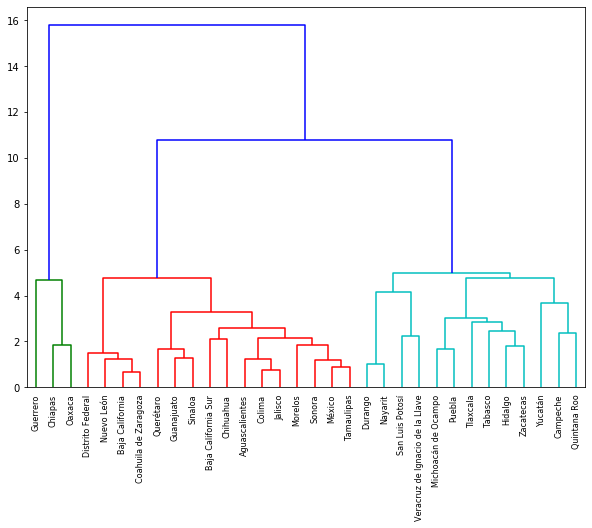

In [56]:
linked = linkage(X_esc, 'ward')
etiquetas = indice_15.index.tolist()
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=etiquetas, leaf_rotation=90,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold = 6)
plt.show()

**Interpreta el dendograma**:
    
1. ¿Cómo es la solución de 3 grupos?
2. ¿Qué significan las distancias verticales en esta gráfica?
3. ¿Cómo puedes interpretar el ordenamiento de los casos en el eje horizontal?
4. ¿Qué soluciones crees que podrían ser útiles?

### Obtén la variable de grupos

In [57]:
agrupador = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = "ward")
ajuste = agrupador.fit(X_esc)
ajuste.labels_

array([2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 0])

In [60]:
indice_15['grupo'] = ajuste.labels_
indice_15.sort_values('grupo')

,ANALF,SPRIM,OVSDE,OVSEE,OVSAE,VHAC,OVPT,PL<5000,PO2SM,grupo
NOM_ENT,,,,,,,,,,
Michoacán de Ocampo,8.35,25.35,2.32,0.81,4.26,28.05,5.90,40.58,44.88,0
Veracruz de Ignacio de la Llave,9.51,25.04,1.53,1.62,13.39,32.03,6.84,46.20,49.68,0
Tlaxcala,3.98,12.60,1.36,0.47,1.14,32.00,2.00,36.40,51.47,0
Tabasco,5.40,17.25,1.81,0.43,10.10,32.50,3.69,53.65,36.96,0
San Luis Potosí,6.33,18.87,2.34,2.29,10.68,25.21,5.56,40.08,43.64,0
Quintana Roo,3.90,13.32,2.19,1.11,2.70,36.31,2.41,14.36,28.32,0
Puebla,8.39,21.32,1.58,0.88,6.94,35.27,5.69,38.50,52.16,0
Nayarit,5.07,17.56,4.66,2.54,4.36,27.63,3.92,39.14,37.96,0
Yucatán,7.47,21.17,10.1,1.08,1.64,36.42,1.67,26.27,47.60,0


## Parte 2

1. Repite el ejercicio anterior usando la liga de completa o promedio. 
2. Compara resultados. 
3. Corre incluyendo y no incluyendo la variable de población total.